# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [4]:
install.packages('kohonen')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [31]:
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

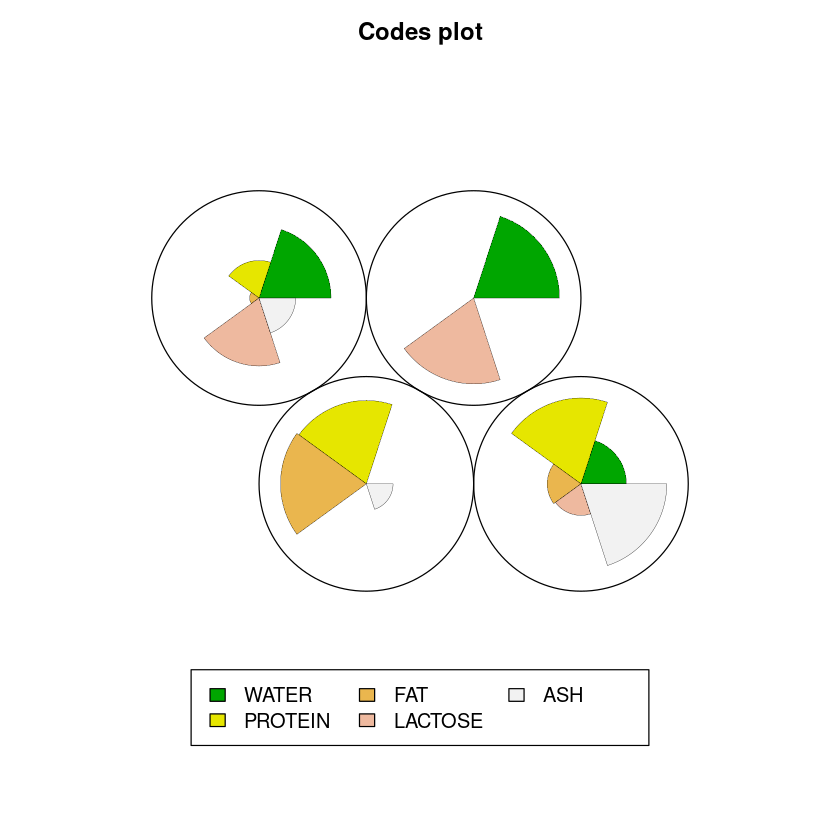

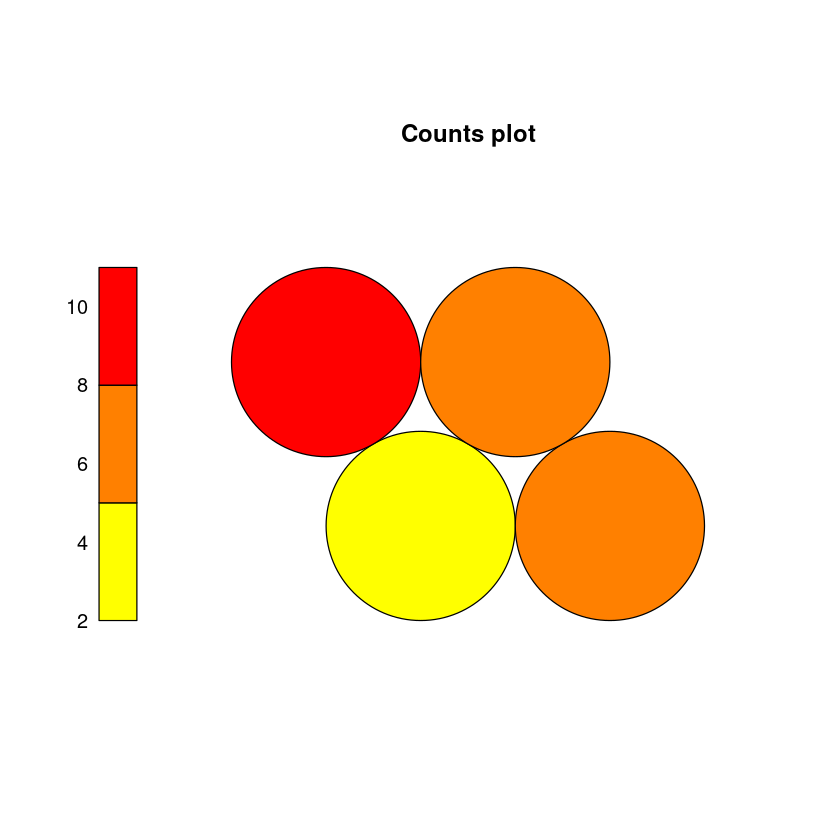

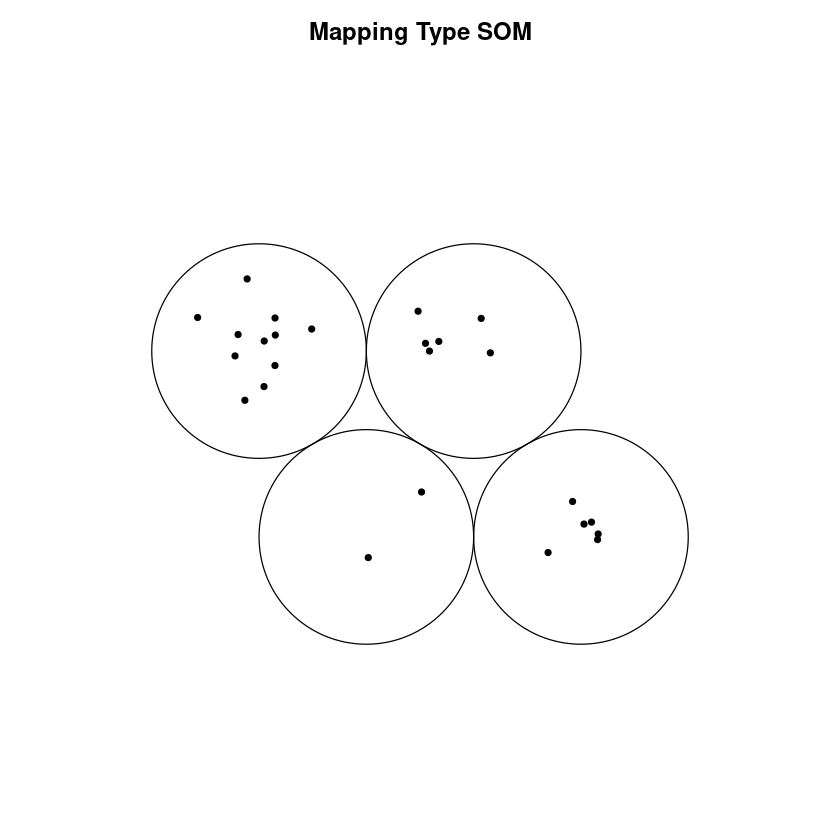

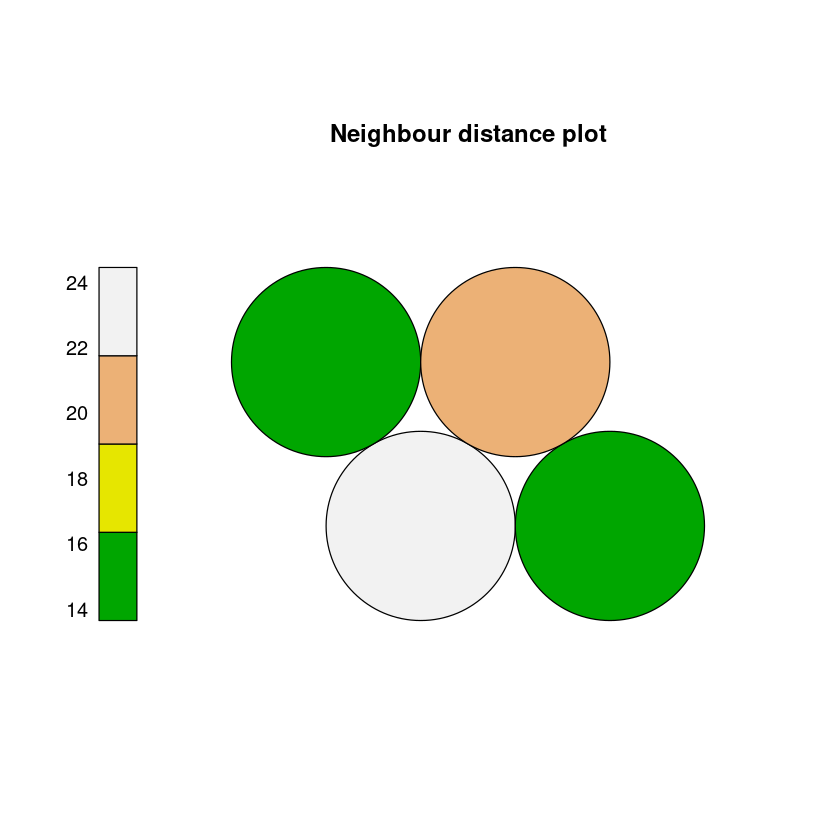

In [32]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


Ejercicio 1: 
a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.
b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

<h5>Respuestas</h5>

A) El método ***som*** funciona de la siguiente manera:
- El tamaño de la grilla del mapa es definido
- A cada celda en la grilla se le asiga un vector inicializador en el espacio de los datos
- Los datos son repetidamente alimentados al modelo para entrenarlo. Cada vez que un vector de entrenamiento es ingresado, el proceso siguiete toma lugar:
 - La celda de la grilla con el vector representativo más cercano al vector de entrenamiento es identificado
 - Todos los vecotres representativos de las celdas cercanas a la identificada son ligeramente ajustados al vector de entrenamiento
- Varios parámetros de convergencia fuerzan los ajustes par que sean cada vez mas pequeños a la vez que los vectores de entrenamiento con alimentados varias veces, causando que el mapa se estabilize en una representación

Los parámetros que recibe son los siguientes:

|Parámetro|Descripción|
|---|---|
|data|Una matriz, con cada fila representando un objeto|
|grid|Una grilla para los representativos|
|rlen|El numero de veces que el dataset completo sera presentado a la red|
|alpha|Ratio de aprendizaje, un vector de dos numeros indicando la cantidad de cambio|
|radius|El radio de la vecindad, puede ser un numero o un vector|
|init|Los representativos iniciales, representados como una matriz|
|toroidal|Si es **TRUE**, los bordes del mapa se unen|
|n.hood|La forma de la vecindad, puede ser *circular* o *cuadrado*|
|keep.data|Si es **TRUE**,retorna la data original y la informacion de mapeo|

B)

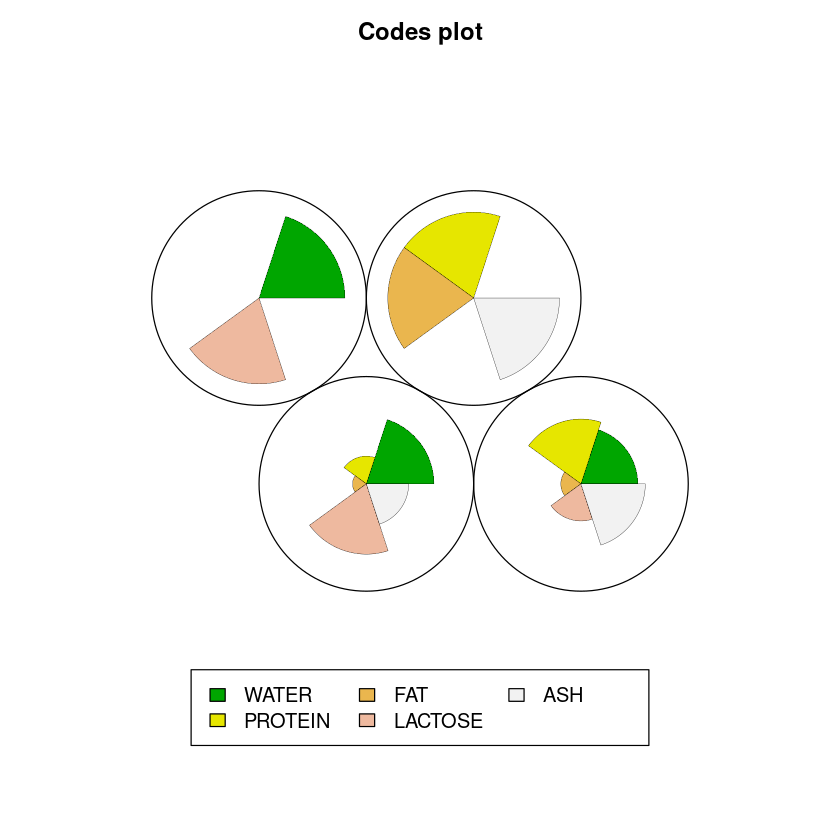

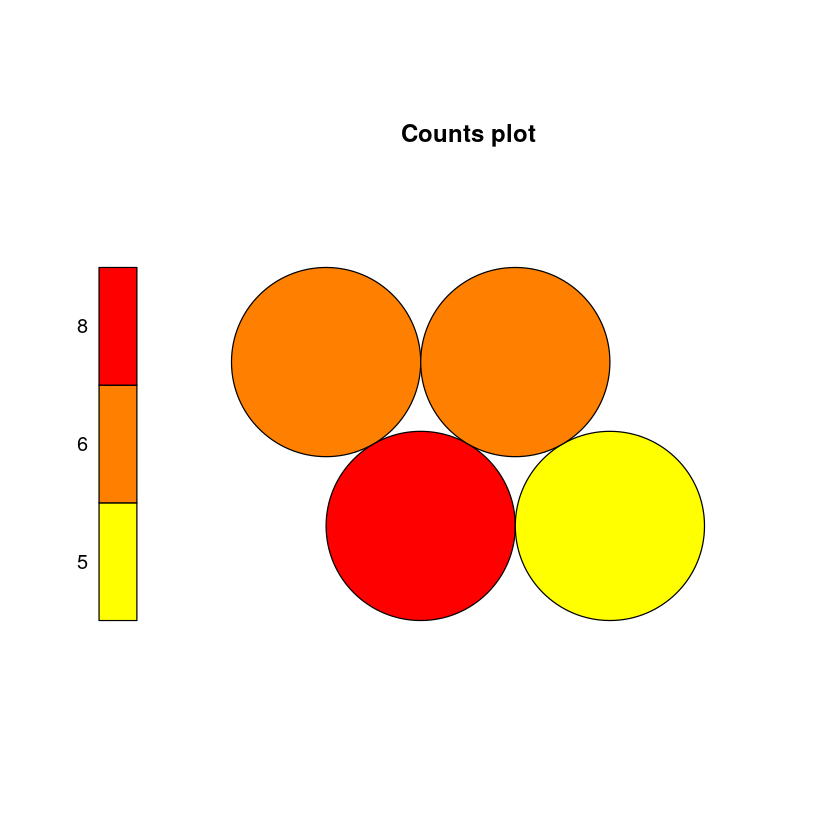

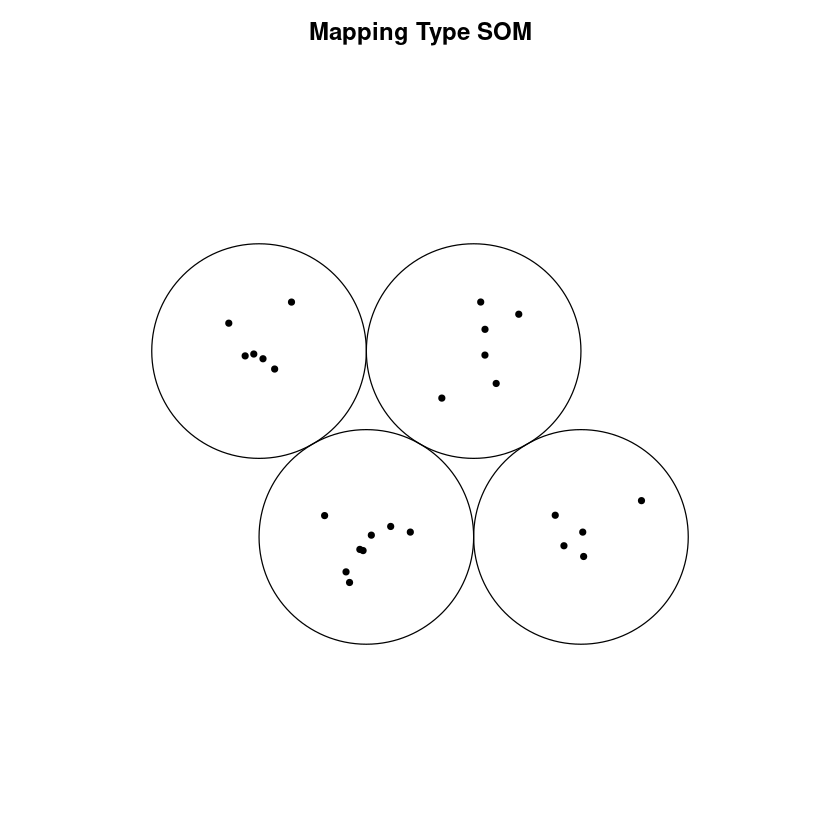

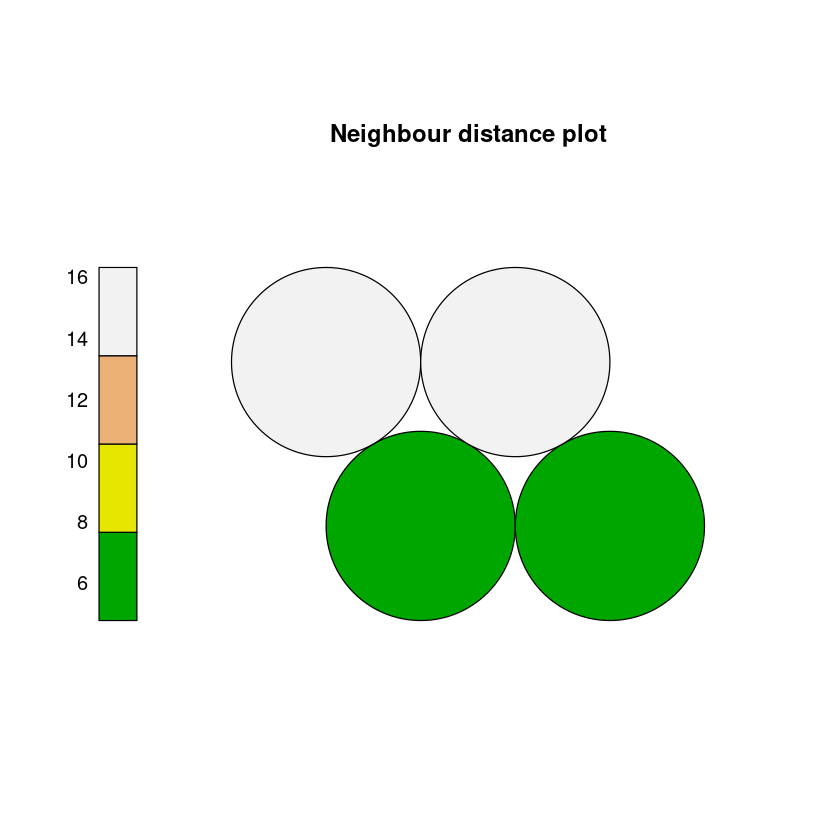

In [29]:
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"), rlen=100)
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

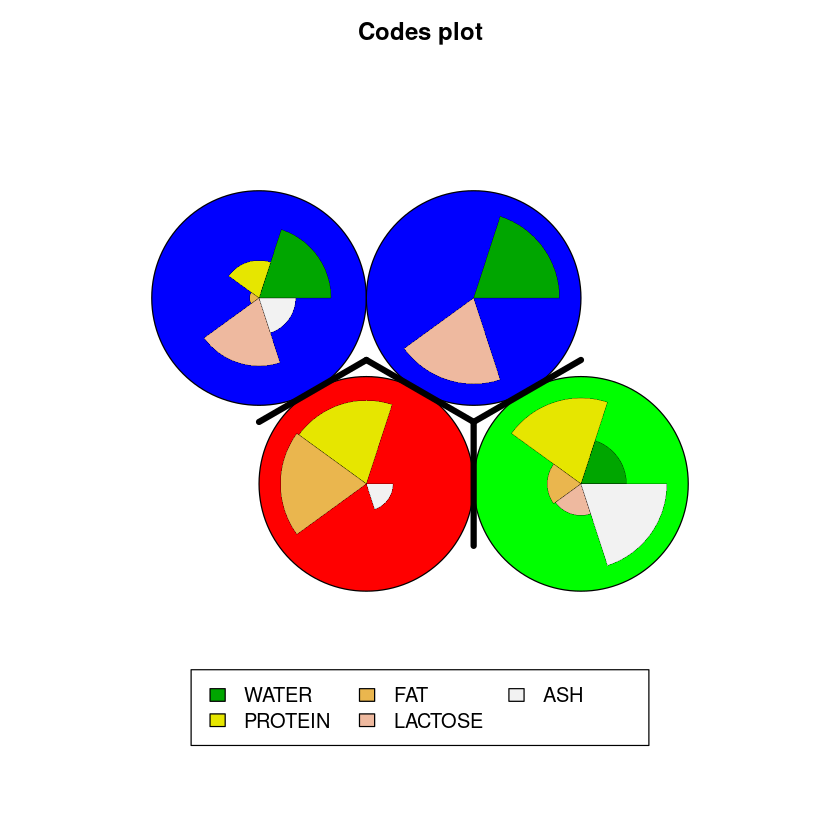

In [33]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: 

a) Explique como funciona esta nueva visualización.

b) Interprete y comente los resultados obtenidos. 

Ejercicio 3: 

a) Proponga un nuevo conjunto de datos a los cuales aplicar este algoritmo. Justifique su elección

b) Realice las estimaciones y discuta sus resultados.